# Detecting Alzheimer's in Elderly Patients budget ass code 💀

In [ ]:
#importing relevant libraries, add more if needed idk man
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [ ]:
#idk how to retrieve the file without mounting drive, im not smart for this shit man
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/CSS2 - Group5/oasis_longitudinal_demographics_data.csv")
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


# Data Exploration
*Explore the entire dataset before preprocessing*

Data variables:
- `Subject ID`: ID of the subject
- `MRI ID`: ID used for the MRI image (not using since we cant get that to work because god hates me)
- `Group`: If the person had alzheimers **CLASSIFICATION VARIABLE**
- `Visit`: The visit number of the patient **(probably not using idk)**
- `MR Delay`: something idk man
- `M/F`: gender
- `Hand`: hand dominance **(not using cause the distribution is too biased)**
- `Age`: age
- `EDUC`: education levels
- `SES`: socieconomic status
- `MMSE`: mini mental state examination
- `CDR`: clinical dementia rating
- `eTIV`: estimated total intracranial volume
- `nWBV`: normalize whole brain volume
- `ASF`: atlas scaling factor

In [ ]:
#hand values are all right handed so we are not using that
df.Hand.value_counts()

,count
Hand,
R,373



NOTE: When analysing, ig use `df_copy` instead of `df` since i replaced *Converted* with *Demented* to allow binary classification

* Demented is group 0
* Nondemented is group 1
---






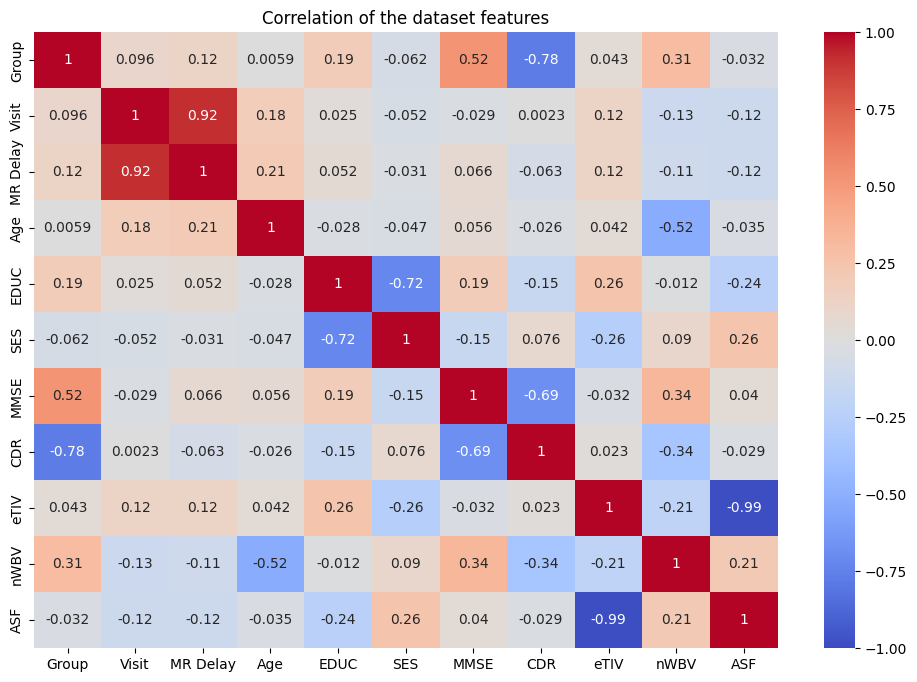

In [ ]:
#preparing the correlation matrix for the dataset
encoder = LabelEncoder()

#replacing the "Converted" value into "Demented" to allow binary classification
df_copy = df.copy()
df_copy['Group'] = df_copy['Group'].replace({'Converted': 'Demented'})
# print(df_copy['Group'].value_counts())
df_copy['Group'] = encoder.fit_transform(df_copy['Group'])
# display(df_copy)


#creating the correlation
df_corr = df_copy.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_corr.corr()

#displaying the correlation
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of the dataset features')
plt.show()

In [ ]:
print(encoder.classes_)

['Demented' 'Nondemented']


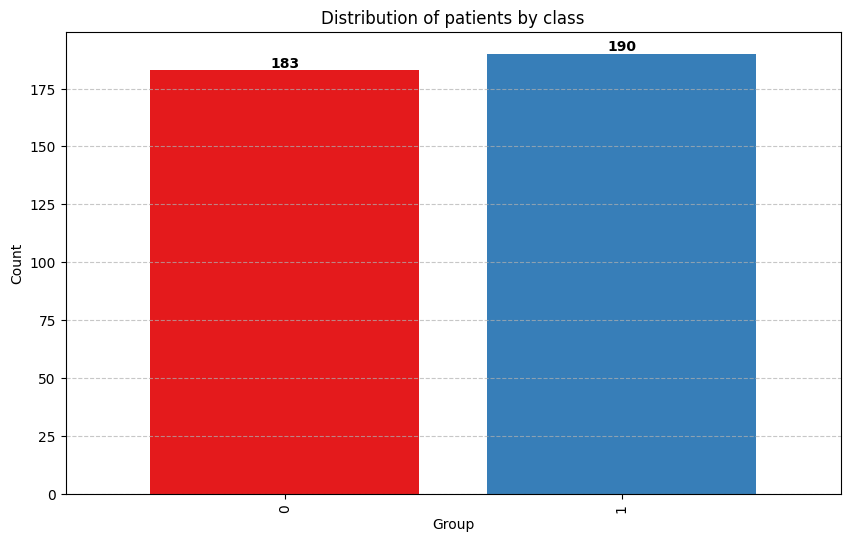

In [ ]:
classes = df_copy.Group.value_counts(ascending=True)

ax = classes.plot(kind='bar', figsize=(10, 6), color=plt.cm.Set1.colors, width=0.8)

for p in ax.patches:
  ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel("Group")
plt.ylabel("Count")
plt.title("Distribution of patients by class")
plt.grid(axis='y', linestyle='--', alpha=0.7)

The class distribution is fairly balanced so idk if we need to balance it more or not using SMOTE.

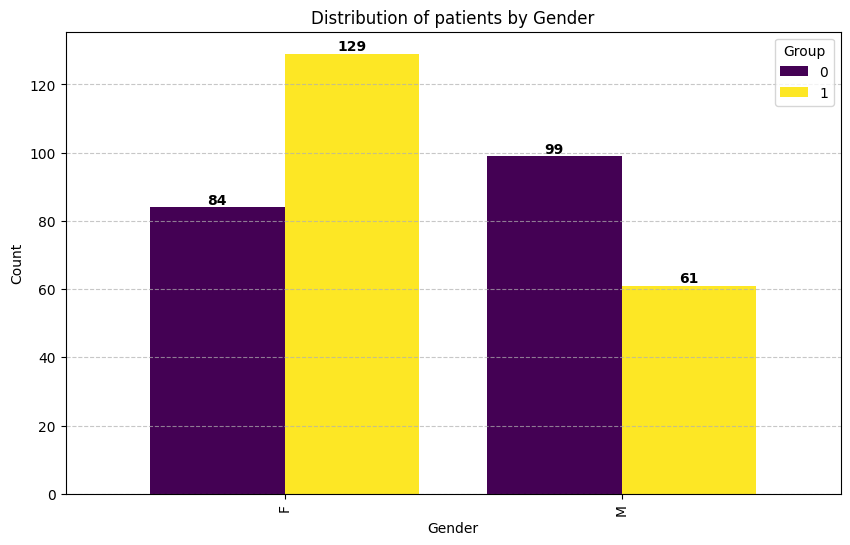

In [ ]:
#bar chart of the gender based on group
#NOTE: we're gonna have to merge "Converted" with "Demented" when classifying, i started doing it in the preprocessing section.
#ps, i merged them here on a COPY of the dataset.
gender_counts = df_copy.groupby(['M/F', 'Group']).size().unstack()

ax = gender_counts.plot(kind='bar', figsize=(10, 6), colormap='viridis', width=0.8)

for p in ax.patches:
  ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of patients by Gender")
plt.legend(title="Group")
plt.grid(axis='y', linestyle='--', alpha=0.7)

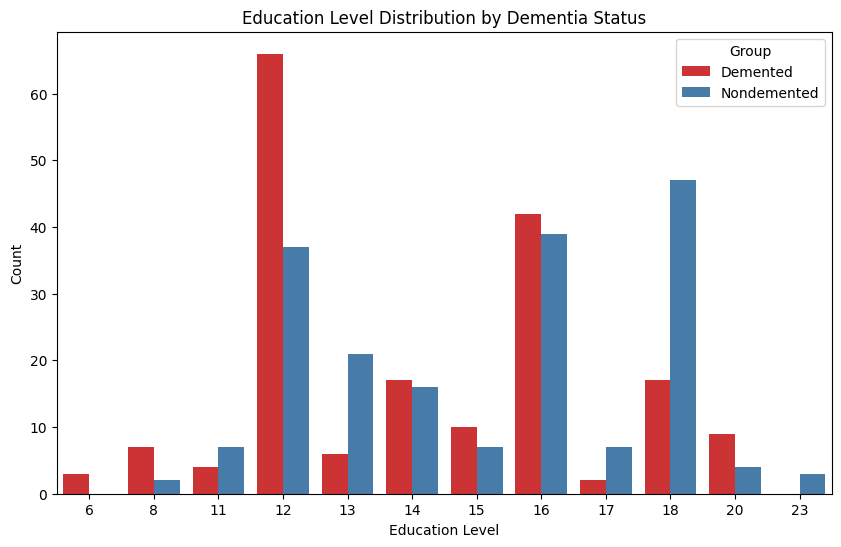

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_copy, x='EDUC', hue='Group', palette='Set1')
plt.title('Education Level Distribution by Dementia Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Group', labels = ["Demented", "Nondemented"])
plt.show()

* Large majority of Demented individuals recieved level 12 education
* At level 20, Nondemened count is slightly higher, could suggest higher education does not directly correlate to protection against Dementia



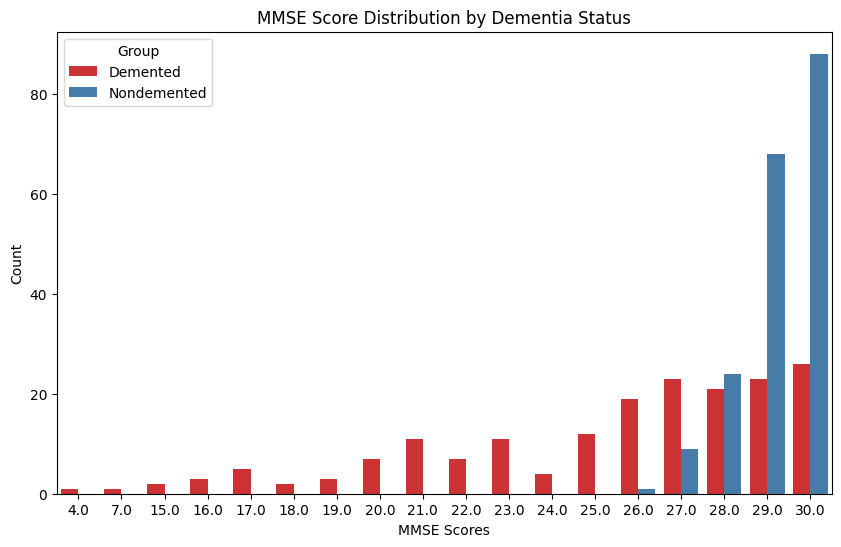

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_copy, x='MMSE', hue='Group', palette='Set1')
plt.title('MMSE Score Distribution by Dementia Status')
plt.xlabel('MMSE Scores')
plt.ylabel('Count')
plt.legend(title='Group', labels = ["Demented", "Nondemented"])
plt.show()

MMSE (Mini Mental State Examination) : Used to assess cognitive function, often used to screen for cognitive impairments; higher is better.
* Nondemented people generally have higher MMSE scores
* Much wider spread for the Demented

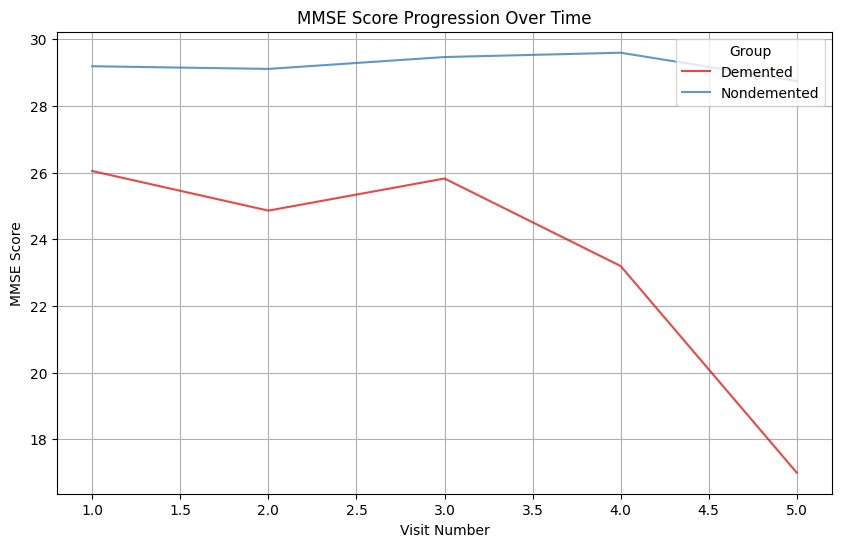

In [ ]:
data_sorted = df_copy[['Subject ID', 'Group', 'Visit', 'MMSE']].sort_values(by=['Subject ID', 'Visit'])

plt.figure(figsize=(10, 6))
sns.lineplot(x='Visit', y='MMSE', hue='Group', data=data_sorted, errorbar=None, alpha=0.8, palette='Set1')
plt.title('MMSE Score Progression Over Time')
plt.xlabel('Visit Number')
plt.ylabel('MMSE Score')
plt.legend(title='Group', loc='upper right', labels = ["Demented", "Nondemented"])
plt.grid(True)
plt.show()

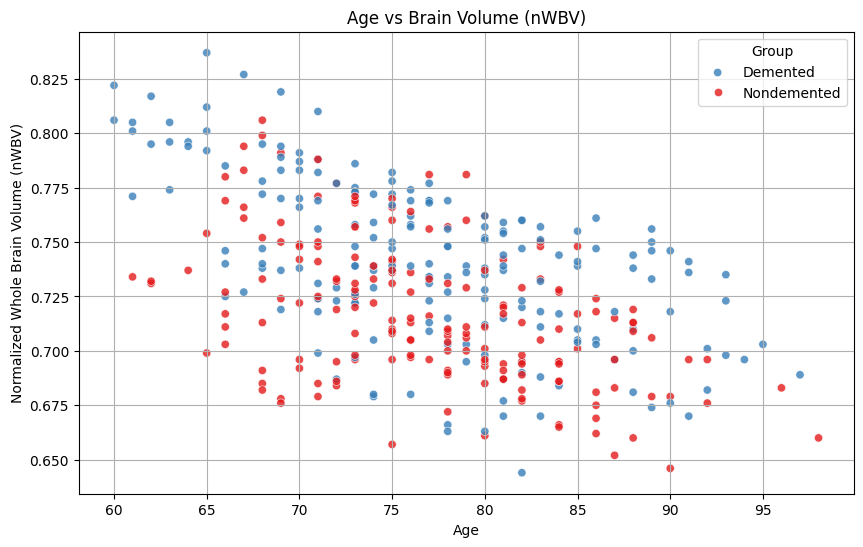

In [ ]:
data_sorted = df_copy[['Age', 'Group', 'nWBV']]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='nWBV', hue='Group', data=data_sorted, alpha=0.8, palette='Set1')
plt.title('Age vs Brain Volume (nWBV)')
plt.xlabel('Age')
plt.ylabel('Normalized Whole Brain Volume (nWBV)')
plt.legend(title='Group', loc='upper right', labels = ["Demented", "Nondemented"])
plt.grid(True)
plt.show()

# Data Preprocessing hf with that 👍

In [ ]:
#not using these variables, feel free to mess around and change them idk
df = df.drop(columns=["MRI ID", "Group", "Hand"])
display(df)

,Subject ID,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,2,842,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,3,2297,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,1,0,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,2,763,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
#PLEASE CHANGE ME
#change converted to demented to allow binary classification. we are not doing multi classification.
df.loc[df['Group'] == "Converted"] = "Demented"

KeyError: 'Group'